# Project 04-04: Kmeans Clustering
*by Thorge Dobbertin, Julia Köberle, Marilena Wittmaack und Benedict Wolf*


In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import sklearn.cluster as sk

## WWDK Package

We created a Package divided into three modules. The first module *Data* preprocesses our data to make clustering easier. The next module *Cluster* allows to choose a clustering method to cluster the data. The third module *Utilities* contains useful functions to present the data and compare our Clustering methods against the sklearn implementations

In [3]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import utilities as u

## Kmeans

The Kmeans class uses the sklearn estimators and cotains the following methods:

In [ ]:
Kmeans(inits=10, k=8, maxit=300, method="++", tol = 1e-3)

##### inits : int, optional, default:10
Number of random initializations that are tried. 
##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### maxit : int, optional, default:300
Maximal amount of iterations from creation of a minibatch to moving the centroids to new position.
##### method : {‘++’ or ‘rng’}, default: ‘++’
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: choose x points at random from data for the initial centroids.
##### tol : float, optional, default:1e-3
Control early stopping based on the difference between the old and new centroids' positions. 


In [ ]:
Kmeans.fit(data)

Fits the data into k clusters, returns:

cluster_centers_ = centroids

labels_ = assignments to centroids

inertia_ = best_clust

In [ ]:
Kmeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

In [ ]:
Kmeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

## Minibatch Kmeans

Different to Kmeans, MiniBatchKMeans uses not all data points at once to cluster the data, but uses randomly chosen batches from data.
The MiniBatchKMeans class contains the following methods:

In [ ]:
MiniBatchKMeans(k=8, inits=10, max_iterations=300, tol=1e-3, batch_size=100, method = "++")

##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### inits : int, optional, default:10
not included now, but may be added
##### max_iterations : int, optional, default:300
Maximal amount of iterations from creation of a minibatch to moving the centroids to new position.
##### tol : float, optional, default:1e-3
Control early stopping based on the difference between the old and new centroids' positions. 
##### batch_size : int, optional, default:100
Size of the mini batches.
##### method : {‘++’ or ‘rng’}, default: ‘++’
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: choose x points at random from data for the initial centroids.

In [ ]:
MiniBatchKMeans.create_batch(data)

Chooses random points from data.

In [ ]:
MiniBatchKMeans.initialize(data)

Sets centroid points from data randomly(‘rng’) or with k++ method (‘++’).

In [ ]:
MiniBatchKMeans.expectation(data, centroids)

Measures the euclidean distance between each point of data and each centroid.

In [ ]:
MiniBatchKMeans.maximization(data, assignments, centroids, centroid_count)

Assigns datapoints to centroids and counts the assigned points to calculate a learning rate. The centroids are moved to newly determined centroids according to learning rate.

In [ ]:
MiniBatchKMeans.final_assignments(data, centroids)

Assigns all datapoints of data to centroids.

In [ ]:
MiniBatchKMeans.fit(data)

Fits the data into k clusters, using the methods explained before. Returns:

labels_ = assignments to centroids

cluster_centers_ = centroids

In [ ]:
MiniBatchKMeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

In [ ]:
MiniBatchKMeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

## WWDK vs sklearn

First we have a look at a random training data set. The 8 cluster are already clearly visible in this case.
We use this data to compare our algorithm (WWDK) and the sklearn implementation.

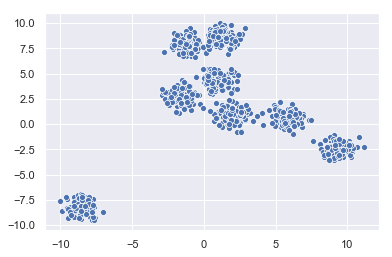

In [4]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X[:, 0], X[:, 1]);

Looking at an elbow plot, its difficult to determine the best number of centroids k. The global distribution of the data is challenging as some clusters are really close together and we have an outlier. 

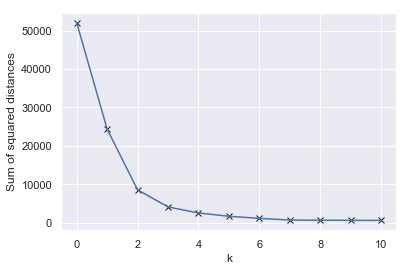

In [5]:
u.elbow_plot(X, max_k=10) 

#uses our WWDK vanilla code with set parameters to calculate the inertia

As we know what to expect, we choose the number of clusters k=8. 

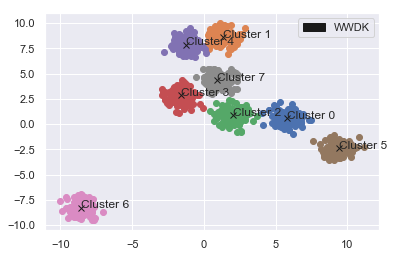

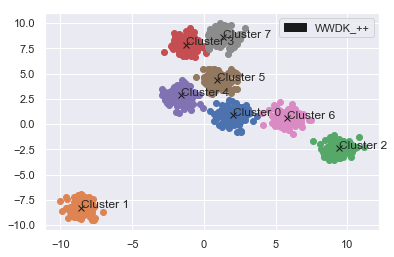

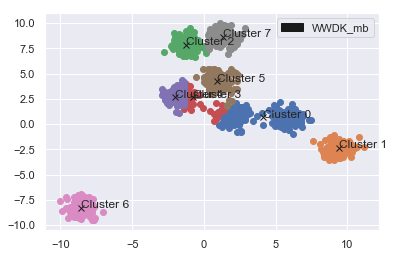

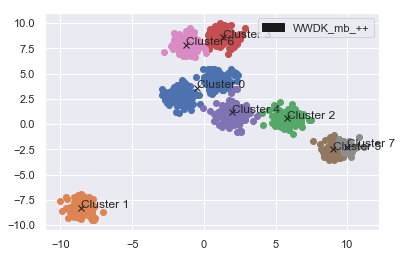

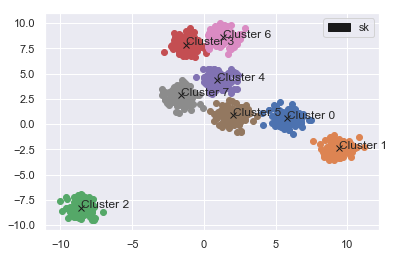

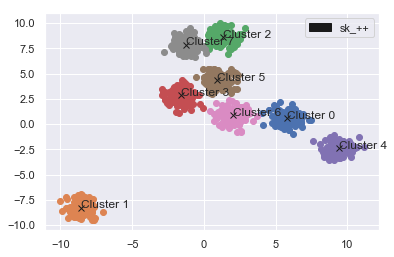

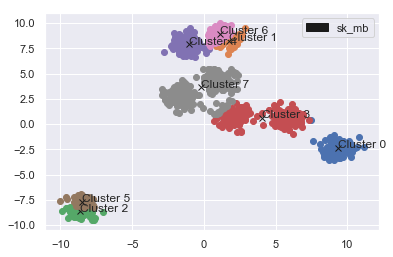

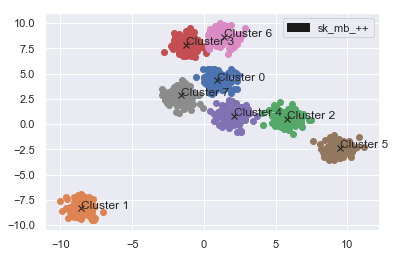

In [6]:
WWDK = cl.Kmeans(method="rng", k=8)
X1 = WWDK.fit(X)

WWDKplus = cl.Kmeans(k=8)
X2 = WWDKplus.fit(X)

WWDKmb = cl.MiniBatchKMeans(method="rng", k=8)
X3 = WWDKmb.fit(X)

WWDKmbplus = cl.MiniBatchKMeans(k=8)
X4 = WWDKmbplus.fit(X)

SK = sk.KMeans(init="random", n_clusters=8)
X5 = SK.fit(X)

skplus = sk.KMeans(n_clusters=8)
X6 = skplus.fit(X)

skmb = sk.MiniBatchKMeans(init="random", n_clusters=8)
X7 = skmb.fit(X)

skmbplus = sk.MiniBatchKMeans(n_clusters=8)
X8 = skmbplus.fit(X)

#useful definition from our utilities module to quickly plot clustering, k=8 had to be defined for labeling
u.plot_compare(X,WWDK.labels_, WWDK.cluster_centers_, 8, title="WWDK")
u.plot_compare(X,WWDKplus.labels_, WWDKplus.cluster_centers_, 8, title="WWDK_++")
u.plot_compare(X,WWDKmb.labels_, WWDKmb.cluster_centers_, 8, title="WWDK_mb")
u.plot_compare(X,WWDKmbplus.labels_, WWDKmbplus.cluster_centers_, 8, title="WWDK_mb_++")
u.plot_compare(X,SK.labels_, SK.cluster_centers_, 8, title="sk")
u.plot_compare(X,skplus.labels_, skplus.cluster_centers_, 8, title="sk_++")
u.plot_compare(X,skmb.labels_, skmb.cluster_centers_, 8, title="sk_mb")
u.plot_compare(X,skmbplus.labels_,skmbplus.cluster_centers_, 8, title="sk_mb_++")

Most of the time all algorithms seem to give us a reasonable clustering. Only our minibatch implementation seems to have problems most of the times, which is often fixed with the ++ implementation.

Comparing our package to sklearn we find our algorithm to be slower (regarding different number of centroids k and several runs/ inits) but of very similiar cluster quality.
For better understanding: our utility functions contain 2 parameters without defaults

time_k_plot(data, iterations, runs)

time_k_plot_mb(data, iterations, runs)

inertia_k_plot(data, iterations, runs)

time_init_plot(data, iterations, runs)

##### iterations
Maximal number of x variable which is tested against (k or inits)

##### runs
Number of repetitions for the whole code (for each x parameter which we test against). Takes the mean in the end. This is to avoid random fluctuations inherent to the algorithm itself.


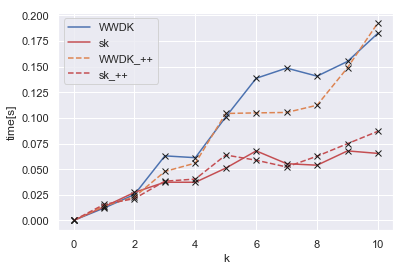

In [7]:
u.time_k_plot(X, iterations=10, runs=10)

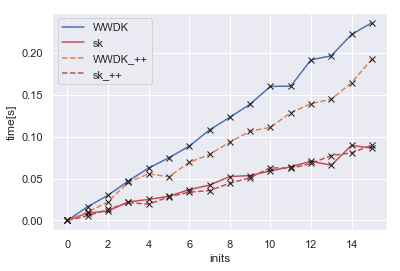

In [8]:
u.time_init_plot(X, iterations=15, runs=10)

The difference between WWDK and sklearn becomes more eveident for higher k and inits. Nontheless it is notable that our ++ implementation can be even faster than our vanilla initiation.

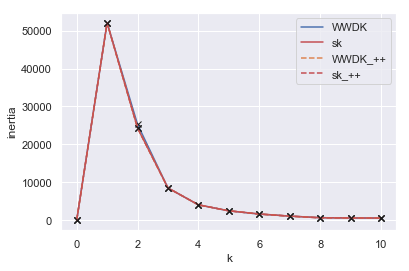

In [9]:
u.inertia_k_plot(X, iterations=10, runs=10) #inertia... Sum of squared distances of samples to their closest cluster center

Slower but WWDK minimises the inertia as well as sklearn without notable difference between ++ and random initiation.

#### Now we test the MiniBatch:

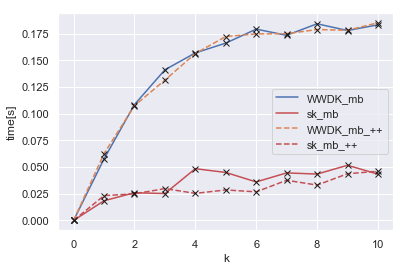

In [10]:
u.time_k_plot_mb(X, iterations=10, runs=10)

The time difference between WWDK and sklearn is more evedient than before, especially for smaller k.

We compare our minibatch against our fullbatch approach:

In [ ]:
u.time_k_wwdk_compare(X, iterations=20, runs=5, batchsize=100) #another parameter batchsize to increase comparison possibilities

Minibatch only becomes faster for larger k. As minibatch is designed for bigger datasets, we can better see its advantage looking at one:

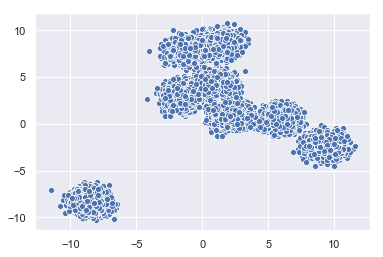

In [14]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X2, y_true = make_blobs(n_samples=30000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X2[:, 0], X2[:, 1]);

In [ ]:
u.time_k_wwdk_compare(X2, iterations=10, runs=5, batchsize=100)

Instead of 1000 we now look at 30000 datapoints. Here it becomes evident why Minibatch is useful.

### Limitations of kmeans - why to look at the assumptions

Next we look at a datset with a more difficult geometric shape

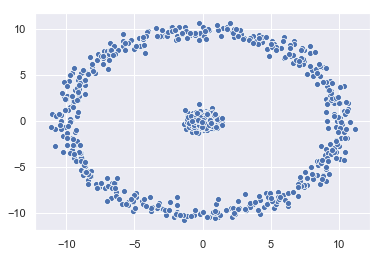

In [15]:
from sklearn import datasets
my_tuple = x, y_true = datasets.make_circles(n_samples=1000, factor=0,
                                      noise=.05)
x= x*10
sns.scatterplot(x[:, 0], x[:, 1]);

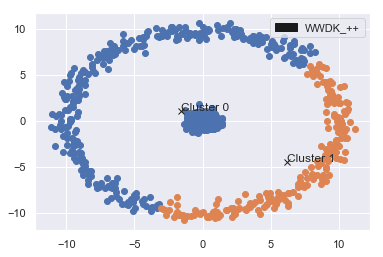

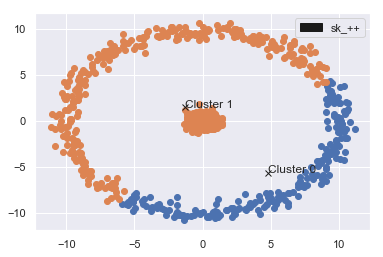

In [17]:
wwdk1 = cl.Kmeans(inits=10, method="rng", k=2)
x1 = wwdk1.fit(x)
sk1 = sk.KMeans(n_init=10, init="random", n_clusters=2)
x2 = sk1.fit(x)

u.plot_compare(x, wwdk1.labels_, wwdk1.cluster_centers_, 2, title="WWDK_++")
u.plot_compare(x, sk1.labels_, sk1.cluster_centers_, 2, title="sk_++")

The algorithms still minimize the within square distance perfectly fine and thereby find clusters. But the minimization assumes spheric clusters. For non-spherical clusters we can either use other algorithms or in some cases (if we know what kind of clusters to expect) we can transform our data beforehand. In this case we can run the algorithms on polar cooridnates instead.


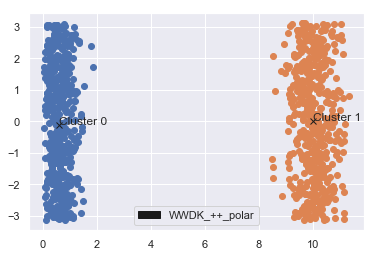

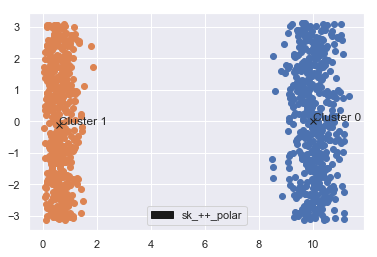

In [18]:
import numpy as np
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2) 
    phi = np.arctan2(y, x)
    points = np.column_stack((rho,phi))
    return (points)
    #return ([rho,phi])

pol = cart2pol(x[:, 0], x[:, 1])

wwdk2 = cl.Kmeans(k=2)
x1 = wwdk2.fit(pol)
sk2 = sk.KMeans(n_clusters=2)
x2 = sk2.fit(pol)

u.plot_compare(pol, wwdk2.labels_, wwdk2.cluster_centers_, 2, title="WWDK_++_polar")
u.plot_compare(pol, sk2.labels_, sk2.cluster_centers_, 2, title="sk_++_polar")


Now we can use this labels to plot the cartesian data. Of course for a correct display the centers would need to be transformed back to cartesian coordinates, too (was not done here because they hold no useful information as cartesian).

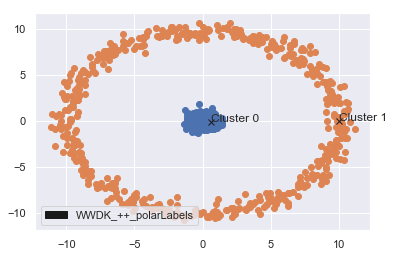

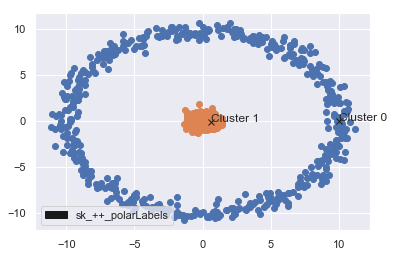

In [20]:
u.plot_compare(x, wwdk2.labels_, wwdk2.cluster_centers_, 2, title = "WWDK_++_polarLabels")
u.plot_compare(x, sk2.labels_, sk2.cluster_centers_, 2, title = "sk_++_polarLabels")

<b> By taking the assumptions our algorithm makes into consideration we can avoid and fix its drawbacks.

## Pokemon Dataset

In next step we wanted to analyze a pokemon dataset. This represents a easy to understand and relatively small dataset to test our clustering.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pkmn = pd.read_csv('Pokemon/pokemon.csv', index_col=0)
pkmn.head()

As one can see

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

red_pkmn = pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed", "Type 1"]]
pkmn_array = np.array(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])

### Without Dimensional Reduction

In [ ]:
u.elbow_plot(pkmn_array,30)

In [ ]:
kmeans_without_dr = cl.Kmeans(k=10)
kmeans_without_dr.fit(pkmn_array)

In [ ]:
pkmn_red =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red["Cluster"] = kmeans_without_dr.labels_

In [ ]:
pkmn_comparer = pkmn_red[pkmn_red.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)).T)

pkmn_final.set_index("Cluster").sort_values(by="Total")


In [ ]:
pkmn_red[pkmn_red.Cluster == 4 ].head()

In [ ]:
pkmn_red[pkmn_red.Cluster == 5 ].head()

### With TSNE

In [ ]:
norm_pkmn = preprocessing.normalize(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
scaled = preprocessing.scale(norm_pkmn)

In [ ]:
pure_sne = TSNE()
pkmn_pure_sned = pure_sne.fit_transform(scaled)

In [ ]:
u.elbow_plot(pkmn_pure_sned, 20)

In [ ]:
kmean_with_dr = cl.Kmeans(k = 10)
kmean_with_dr.fit(pkmn_pure_sned)
u.plot(kmean_with_dr)

In [ ]:
types = np.array(red_pkmn["Type 1"].drop_duplicates())
type_list = np.array(red_pkmn["Type 1"])
tsned_with_type =pd.DataFrame(pkmn_pure_sned)
tsned_with_type["Type"] = type_list

In [ ]:
colors_shapes = ["go","rx","bv","gx", "co", "mv","yx","g^","m*","rh","mX","kD","wo","wD","rP","ko","ys","b*"]
dict_type_color = dict(zip(types,colors_shapes))
for i in range(tsned_with_type.shape[0]):
    color = dict_type_color[tsned_with_type.iloc[i,2]]
    plt.plot(tsned_with_type.iloc[i,0],tsned_with_type.iloc[i,1],color)
plt.show()

In [ ]:
pkmn_red_with_dr =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red_with_dr["Cluster"] = kmean_with_dr.labels_

In [ ]:
pkmn_comparer = pkmn_red_with_dr[pkmn_red_with_dr.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)).T)
pkmn_final.set_index("Cluster")

In [ ]:
pkmn_final.max()

3,3,5,0,6,4,2

## PBMC Dataset

## Creating GIFs